<a href="https://colab.research.google.com/github/arif-github12/Prediksi-Suku-Bunga-dengan-Arsitektur-ConvLSTM/blob/main/Prediksi_Suku_Bunga_dengan_Arsitektur_ConvLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Prediksi Suku Bunga dengan Arsitektur ConvLSTM

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Flatten, Dense
from tensorflow.keras.models import Sequential

In [5]:
df = pd.read_csv('suku_bunga.csv')

In [4]:
df.head()

,suku_bunga,inflasi,harga_emas,nilai_tukar,saham
0,0.912,5.029,2186.162,13317.307,86.0
1,0.899,6.736,1401.762,12792.635,23.0
2,0.567,4.202,3733.292,11442.409,99.0
3,0.396,7.767,1194.708,11134.890,17.0
4,0.305,6.272,2440.474,13725.058,7.0


In [5]:
df.describe()

,suku_bunga,inflasi,harga_emas,nilai_tukar,saham
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.494675,4.984184,3011.684545,12440.493677,49.539000
std,0.289107,2.887152,1159.445548,1426.453763,28.053975
min,0.000000,0.008000,1001.552000,10008.990000,1.000000
25%,0.248750,2.433750,2024.905250,11256.240750,26.000000
50%,0.476000,4.989000,3007.185000,12384.334500,49.000000
75%,0.747250,7.395500,3972.080250,13635.099500,72.000000
max,1.000000,9.982000,4998.445000,14992.872000,100.000000


In [7]:
df.corr()

,suku_bunga,inflasi,harga_emas,nilai_tukar,saham
suku_bunga,1.000000,-0.033414,0.033538,0.064195,0.048042
inflasi,-0.033414,1.000000,0.036550,0.016374,-0.009452
harga_emas,0.033538,0.036550,1.000000,0.029365,0.028853
nilai_tukar,0.064195,0.016374,0.029365,1.000000,0.065851
saham,0.048042,-0.009452,0.028853,0.065851,1.000000


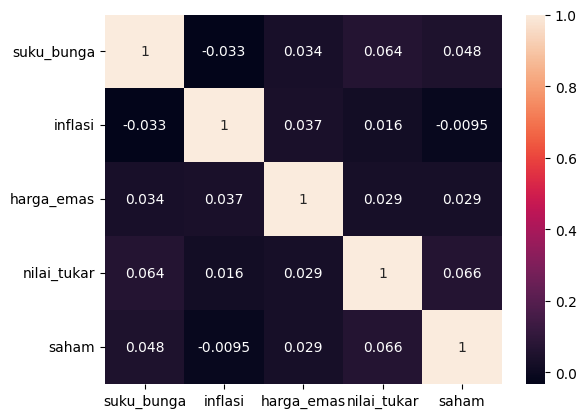

In [10]:
sns.heatmap(df.corr(), annot=True)
plt.show()

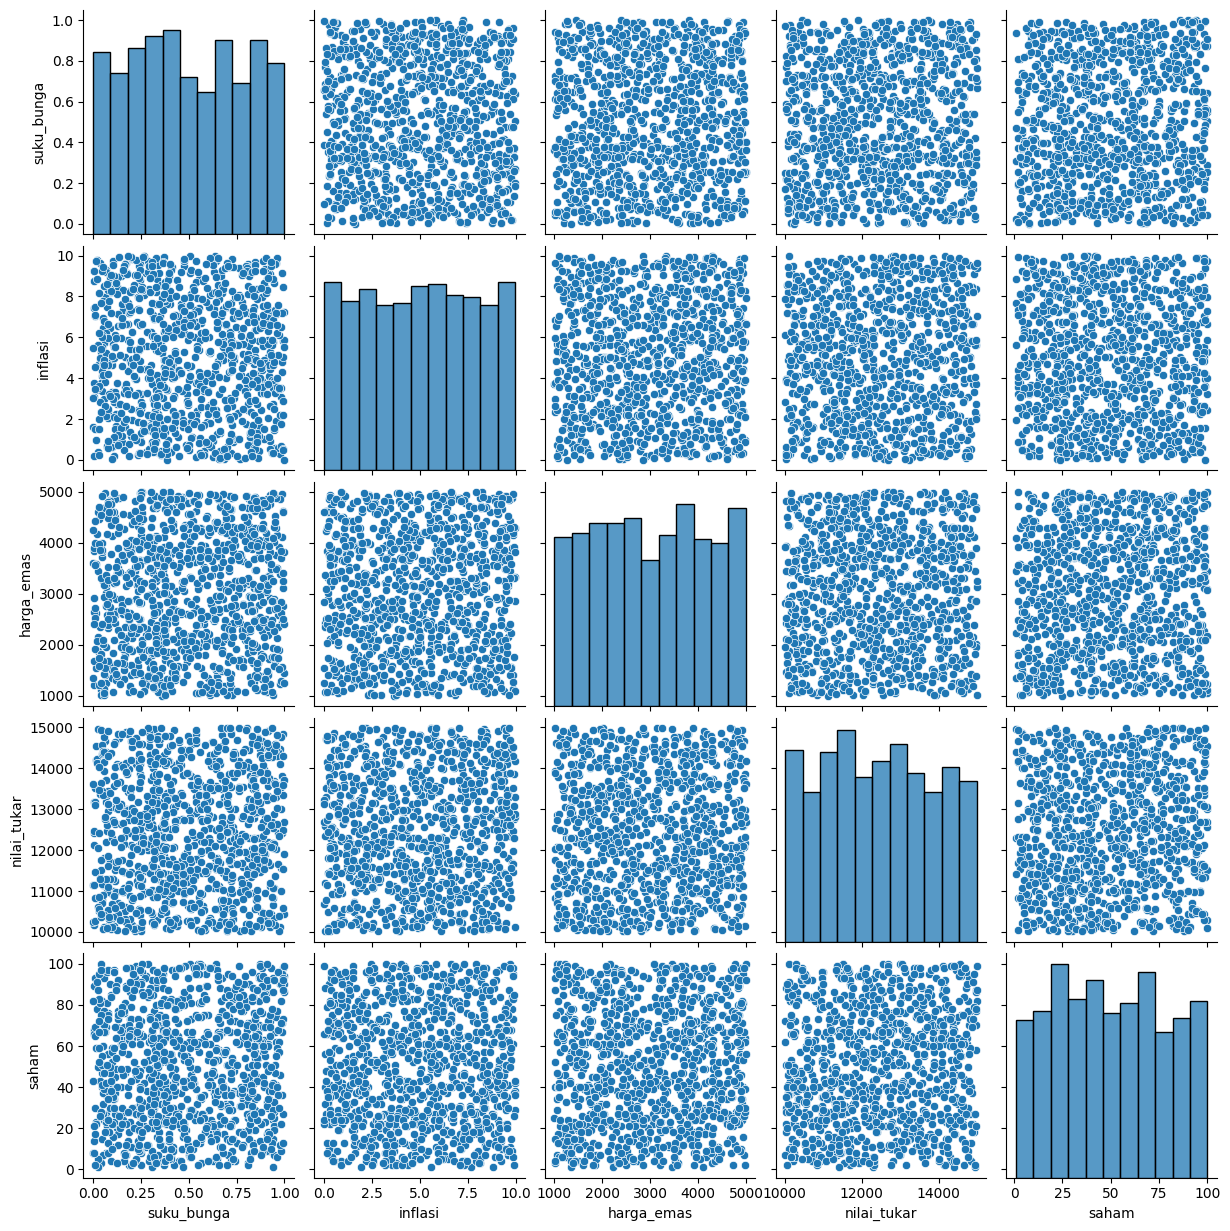

In [11]:
sns.pairplot(df[['suku_bunga', 'inflasi', 'harga_emas', 'nilai_tukar', 'saham']])
plt.show()

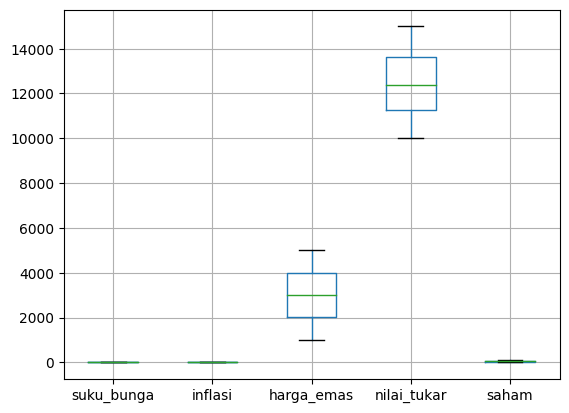

In [12]:
df.boxplot()
plt.show()

In [26]:
data = df.to_numpy()
data = data[:,0].reshape(-1, 1)

In [27]:
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

In [28]:
def create_dataset(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps-1):
        X.append(data[i:(i+n_steps), 0])
        y.append(data[i+n_steps, 0])
    return np.array(X), np.array(y)

In [29]:
n_steps = 12
X_train, y_train = create_dataset(train_data, n_steps)
X_test, y_test = create_dataset(test_data, n_steps)

In [30]:
X_train = X_train.reshape((X_train.shape[0], 1, n_steps, 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, n_steps, 1, 1))

In [31]:
model = Sequential()
model.add(ConvLSTM2D(filters=128, kernel_size=(3,3), input_shape=(1, n_steps, 1, 1), padding='same', return_sequences=True))
model.add(BatchNormalization())
model.add(ConvLSTM2D(filters=64, kernel_size=(3,3), padding='same', return_sequences=True))
model.add(BatchNormalization())
model.add(ConvLSTM2D(filters=32, kernel_size=(3,3), padding='same', return_sequences=False))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(1))

In [32]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Epoch 1/50
25/25 - 14s - loss: 0.7438 - val_loss: 0.2967 - 14s/epoch - 562ms/step
Epoch 2/50
25/25 - 4s - loss: 0.1510 - val_loss: 0.2911 - 4s/epoch - 142ms/step
Epoch 3/50
25/25 - 4s - loss: 0.1063 - val_loss: 0.2872 - 4s/epoch - 165ms/step
Epoch 4/50
25/25 - 3s - loss: 0.0969 - val_loss: 0.2817 - 3s/epoch - 118ms/step
Epoch 5/50
25/25 - 3s - loss: 0.0915 - val_loss: 0.2756 - 3s/epoch - 118ms/step
Epoch 6/50
25/25 - 3s - loss: 0.0883 - val_loss: 0.2696 - 3s/epoch - 134ms/step
Epoch 7/50
25/25 - 4s - loss: 0.0857 - val_loss: 0.2631 - 4s/epoch - 158ms/step
Epoch 8/50
25/25 - 3s - loss: 0.0836 - val_loss: 0.2562 - 3s/epoch - 126ms/step
Epoch 9/50
25/25 - 3s - loss: 0.0816 - val_loss: 0.2488 - 3s/epoch - 126ms/step
Epoch 10/50
25/25 - 4s - loss: 0.0796 - val_loss: 0.2409 - 4s/epoch - 161ms/step
Epoch 11/50
25/25 - 3s - loss: 0.0776 - val_loss: 0.2326 - 3s/epoch - 129ms/step
Epoch 12/50
25/25 - 4s - loss: 0.0756 - val_loss: 0.2237 - 4s/epoch - 163ms/step
Epoch 13/50
25/25 - 3s - loss: 0.07

In [34]:
test_loss = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)

Test loss: 0.3482131063938141


In [35]:
y_pred = model.predict(X_test)

6/6 [==============================] - 1s 25ms/step


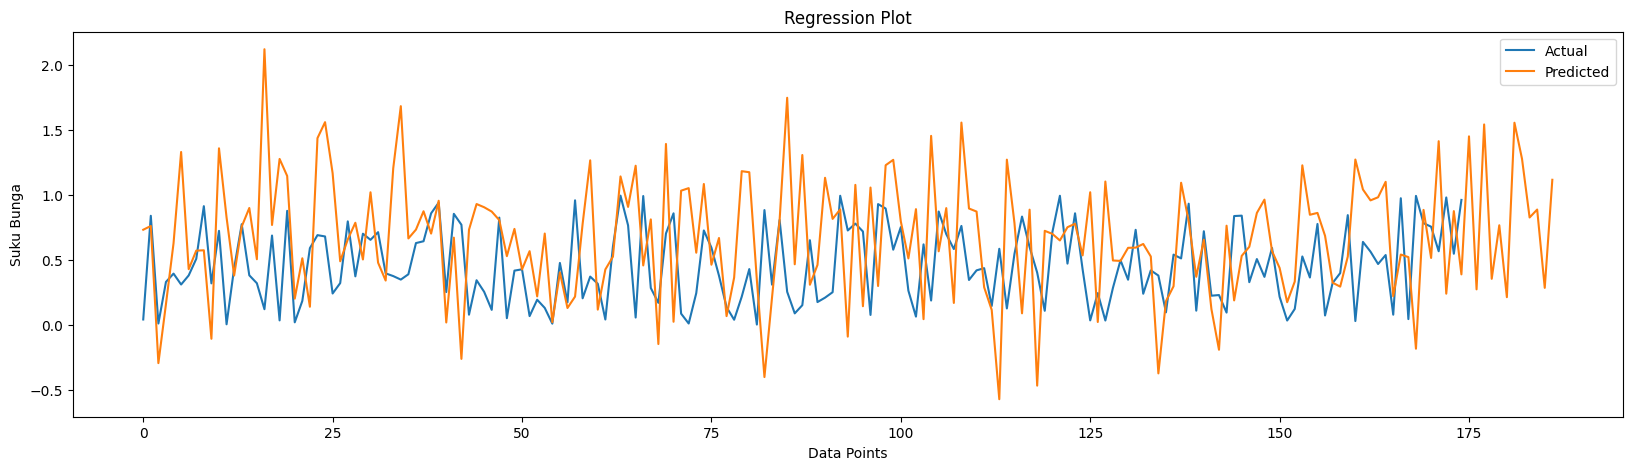

In [39]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(y_test[n_steps:].ravel(), label='Actual')
ax.plot(y_pred.ravel(), label='Predicted')
ax.legend()
ax.set_title('Regression Plot')
ax.set_xlabel('Data Points')
ax.set_ylabel('Suku Bunga')
plt.show()

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 0.4601067379386349
MSE: 0.3482131327501819
RMSE: 0.5900958674234059
